In [1]:
%pylab qt
%matplotlib inline

import scipy.constants as cst
import fitting

Populating the interactive namespace from numpy and matplotlib


In [2]:
##### Paramètres expérimentaux #####
d     = 0.5      ##### Distance sur laquelle on mesure la montée du poid pour la mesure de vitesse
r     = 15.25e-3 ##### Rayon du tambour sur lequel s'enroule la ficelle

In [3]:
##### Mesures #####
# On mesure la durée nécessaire au poids pour parcourir d,
# pendant le régime stationnaire de la remontée du poids,
# à une tension fixée. On relève également le courant.

masses    = np.array([0.5, 1.0, 2.0])

##### masse = 0.5 kg #####
u_m0      = np.array([8.0, 9.0, 10, 11, 12])
i_m0      = np.array([0.135, 0.136, 0.138, 0.138, 0.140])
period_m0 = np.array([6.00, 5.20, 4.56, 4.13, 3.82])

##### masse = 1.0 kg #####
u_m1      = np.array([8.0, 9.0, 10, 11, 12])
i_m1      = np.array([0.205, 0.210, 0.210, 0.210, 0.220])
period_m1 = np.array([6.47, 5.32, 4.78, 4.31, 3.85])

##### masse = 1.0 kg #####
u_m2      = np.array([8.0, 9.0, 10, 11, 12])
i_m2      = np.array([0.340, 0.350, 0.350, 0.360, 0.360])
period_m2 = np.array([7.63, 6.53, 5.59, 5.00, 4.56])

u_all      = [u_m0, u_m1, u_m2]
i_all      = [i_m0, i_m1, i_m2]
period_all = [period_m0, period_m1, period_m2]

# Rendement

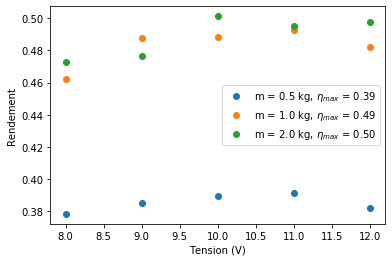

In [4]:
def efficiency(u, i, period, m):
    v = d/period
    f = m*cst.g
    power_meca = f*v
    power_elec = u*i
    return power_meca/power_elec

for i, period in enumerate(period_all):
    intensity = i_all[i]
    voltage   = u_all[i]
    x, y = voltage, efficiency(voltage, intensity, period, masses[i])
    #fitter = fitting.Fit("linear", x=x, y=y)
    #fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)
    #fit_y = fitter.func(x, fit_params[0], fit_params[1])
    #K = fit_params[0]
    plt.plot(x, y, "oC"+str(i), label="m = %.1f kg, $\eta_{max}$ = %.2f"%(masses[i], max(y)))
    #plt.plot(x, fit_y, "-C"+str(i))

plt.xlabel("Tension (V)")
plt.ylabel("Rendement")
plt.legend(loc="best")

D'après la notice du moteur, on trouve un rendement nominal de
$$\eta_{max} = 0{,}507,$$
en utilisant les valeurs nominales :
- $U = 12\ \mathrm{V}$ ;
- $I = 0{,}310\ \mathrm{A}$ ;
- $\Gamma = 300\ \mathrm{mN.m}$ ;
- $\Omega = 2\pi\ \mathrm{rad/s}$.

On retrouve bien cette valeur !

In [5]:
eta = 0.3*2*np.pi/12/0.310
print(eta)

0.5067084925144828


# Lien entre tension et vitesse de rotation

Pour différentes valeurs de couple mécanique, on mesure la vitesse de rotation du moteur en fonction de la tension à ses bornes.

Cette mesure permet de remonter à la constante de couplage électromécanique $K$ définie comme
$$e = K \Omega,$$
où $e$ est la tension utile qui ne tient pas compte des pertes par effet Joule ($U=e+RI$).

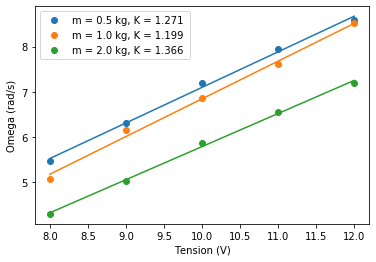

In [7]:
def angular_speed(period):
    v = d/period
    return v/r

for i, period in enumerate(period_all):
    x, y = u_m0, angular_speed(period)
    fitter = fitting.Fit("linear", x=x, y=y)
    fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)
    fit_y = fitter.func(x, fit_params[0], fit_params[1])
    K = 1/fit_params[0]
    plt.plot(x, y, "oC"+str(i), label="m = %.1f kg, K = %.3f "%(masses[i], K))
    plt.plot(x, fit_y, "-C"+str(i))

plt.xlabel("Tension (V)")
plt.ylabel("Omega (rad/s)")
plt.legend(loc="best")

# Lien entre intensité et couple

Pour une tension donnée, on change la masse pour modifier le couple que doit fournir le moteur en régime permanent. Pour cette valeur de couple, on relève l'intensité dans le moteur.

Cette mesure permet de remonter à la constante de couplage électromécanique $K$ définie comme
$$\Gamma = K I.$$

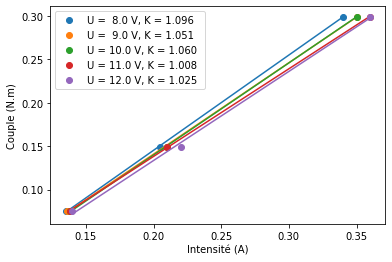

In [9]:
for i, u in enumerate(u_m0):
    x, y = [], []
    for m, intensity, period in zip(masses, i_all, period_all):
        x.append(intensity[i])
        y.append(m*cst.g*r)
    x = np.array(x)
    y = np.array(y)
    fitter = fitting.Fit("linear", x=x, y=y)
    fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)
    fit_y = fitter.func(x, fit_params[0], fit_params[1])
    K = fit_params[0]
    plt.plot(x, y, "oC"+str(i), label="U = %4.1f V, K = %.3f "%(u_m0[i], K))
    plt.plot(x, fit_y, "-C"+str(i))
    
plt.xlabel("Intensité (A)")
plt.ylabel("Couple (N.m)")
plt.legend(loc="best")